In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm
import numpy as np
from scipy.interpolate import interp1d
from orbit_class import Orbit
import misc_utils as mu   
import ifs_noise_model as snr_ifs
import imaging_noise_model as snr_im
import juneper_model as hpm  
import coolTLUSTY_model as cpm
import simulate_data as simdata
import nice_plotting_forms as pf

/Users/blacy/EGPSemesterProject/direct-imaging-sims/WFIRST_SIM/misc_utils.py:159: RuntimeWarning: divide by zero encountered in true_divide
  tau_PSF = interp1d(rlamD,coreThruput/occTrans,fill_value=0.0,bounds_error=False)


In [4]:
epsEri = {}                  
epsEri.update({'d_obs':3.216}) # distance to the observer in parsecs
M = 3.73 - 5.0*np.log10(epsEri['d_obs']/10.0) # convert apparent (3.73) to absolute
epsEri.update({'Mstar':M})   # absolute stellar V-band magnitude 
epsEri.update({'Nez':1.0})     # exozodi level
stellartype = 'k0v'              # stellar type
stellar_mass = 0.781               # stellar mass in units of solar mass 
                                 # this is only used in orbit object, not really relevant for SNR calculations
stellar_spec = 'AuxiliaryData/'+stellartype+'.dat' # imports Hubble 
ref_wl, ref_flambda = np.loadtxt(stellar_spec, unpack=True, usecols=(0,1))
fstar_lambda = interp1d(ref_wl,ref_flambda)  # specific flux density W / m^2 / micron, for zero mag star
epsEri.update({'fstar_lambda':fstar_lambda}) # a function which returns 
                                             # specific flux density for any wavelength
epsEri.update({'rp':0.83294})      # planet radius in Jupiter radii
# epsEri.update({'met':3.0}) 
# epsEri.update({'Ag':cpm.ctlustyAg_more_wl(epsEri['met'])}) 
epsEri.update({'chromo':1.0,'meth':1.0}) 
epsEri.update({'Ag':hpm.juneper_Agfunc(epsEri['chromo'],epsEri['meth'])}) 
a = 3.4            # semimajor axis (in au)
ecc = 0.071         # eccentricity
inc = 90.0          # inclination (degrees)
ome = 180.0         # longitude of ascending node (degrees)
tp = 2530054 % (7.37*365) # epoch of perihelion passage (julian date) 2530054
argperi = 3.13     # argument of perihelion (degrees)    
epsEri_orbit_pars = np.array([ecc,inc,ome,tp,a,argperi,
                       stellar_mass,epsEri['rp'],epsEri['d_obs']])
epsEri_orbit = Orbit(epsEri_orbit_pars) 
ophase = 0.8 # orbital phase
pfunc = mu.avg_empirical # type of phase function to use
simdata.change_ophase(epsEri_orbit, epsEri, ophase, pfunc) # updates params['sep'], params['phi'], params['wa']
epsEri.update(mu.cbe_spc_pars)

/Users/blacy/EGPSemesterProject/direct-imaging-sims/WFIRST_SIM/ifs_noise_model.py:137: RuntimeWarning: divide by zero encountered in true_divide
  return SNR**2.0*rn / (rp**2.0 - (SNR*params['fpp']*rs)**2.0)


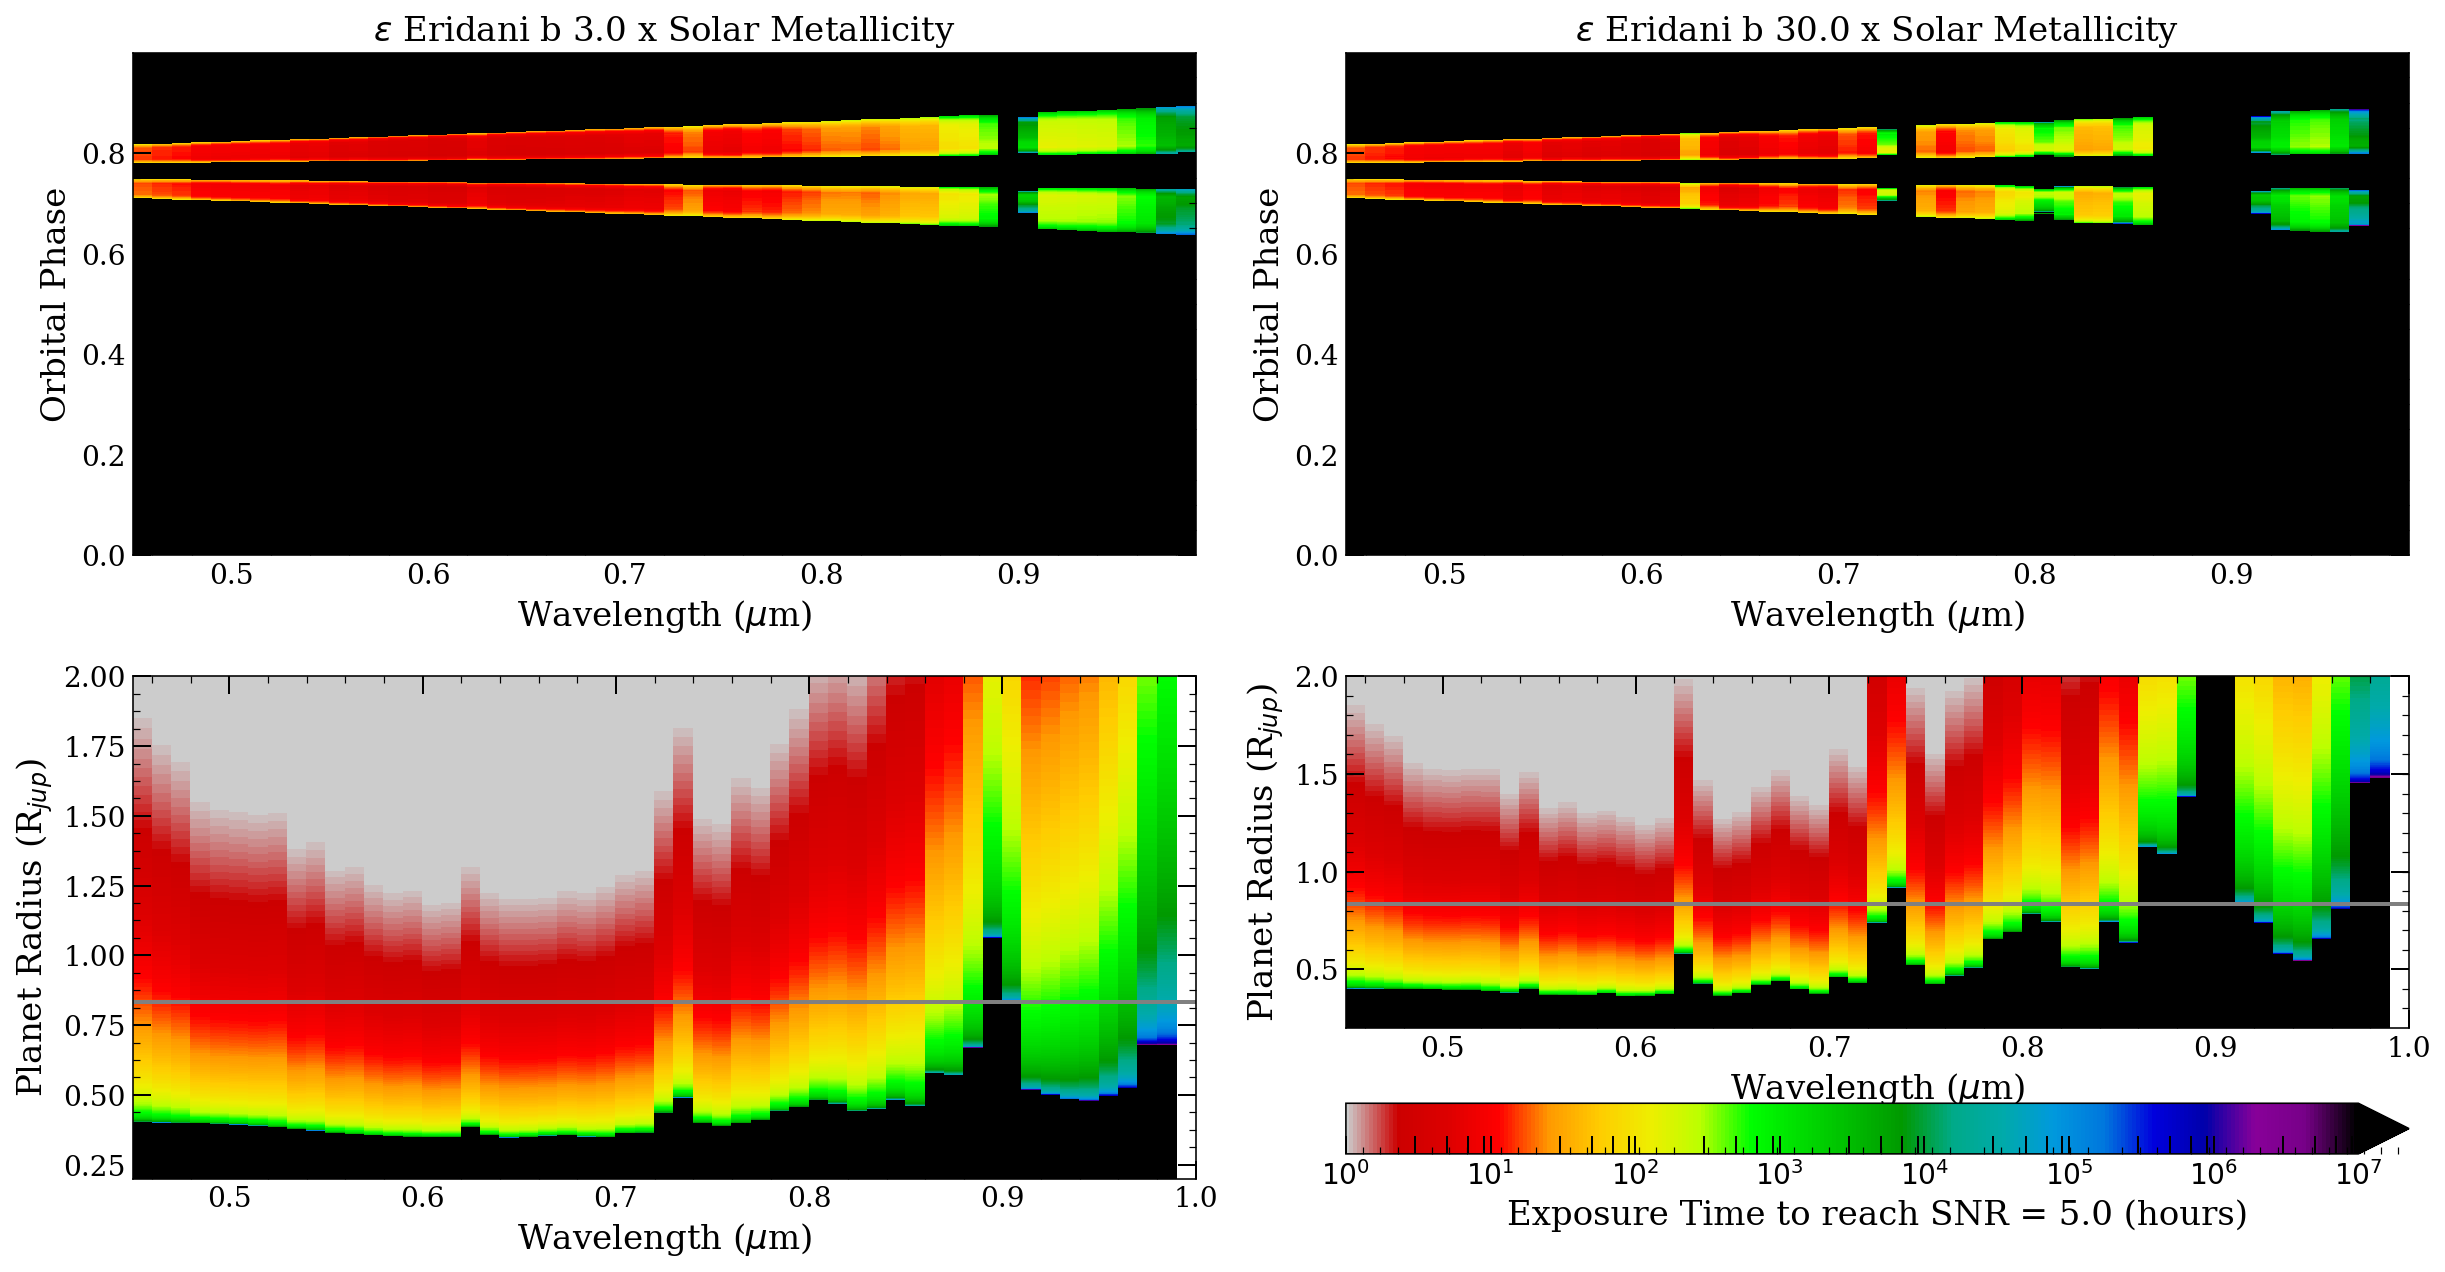

In [5]:
# look at prospects with the IFS

epsEri.update(mu.cbe_spc_pars)

wavelengths = np.arange(0.45,1.0,0.01)
plt.figure(figsize=(17.0, 9.0))
ax=plt.subplot(2,2,1)
epsEri.update({'met':3.0}) 
epsEri.update({'Ag':cpm.ctlustyAg_more_wl(epsEri['met'])}) 
pf.ophase_tsnr_plot(epsEri,epsEri_orbit,wavelengths,5.0,cbar=False)
ax.set_title('$\epsilon$ Eridani b 3.0 x Solar Metallicity',fontsize=17)

epsEri.update({'met':30.0}) 
epsEri.update({'Ag':cpm.ctlustyAg_more_wl(epsEri['met'])}) 
ax=plt.subplot(2,2,2)
pf.ophase_tsnr_plot(epsEri,epsEri_orbit,wavelengths,5.0,cbar=False)
ax.set_title('$\epsilon$ Eridani b 30.0 x Solar Metallicity',fontsize=17)

epsEri.update({'met':3.0}) 
epsEri.update({'Ag':cpm.ctlustyAg_more_wl(epsEri['met'])}) 
ax=plt.subplot(2,2,3)
pf.rp_tsnr_plot(epsEri,wavelengths,5.0,cbar=False)
plt.hlines(0.83294,0.4,1.0,color='grey')
plt.axis([0.45,1.0,0.2,2.0])

epsEri.update({'met':30.0}) 
epsEri.update({'Ag':cpm.ctlustyAg_more_wl(epsEri['met'])}) 
ax=plt.subplot(2,2,4)
pf.rp_tsnr_plot(epsEri,wavelengths,5.0,cbar=True)
plt.hlines(0.83294,0.4,1.0,color='grey')
plt.axis([0.45,1.0,0.2,2.0])

plt.tight_layout()
plt.show()

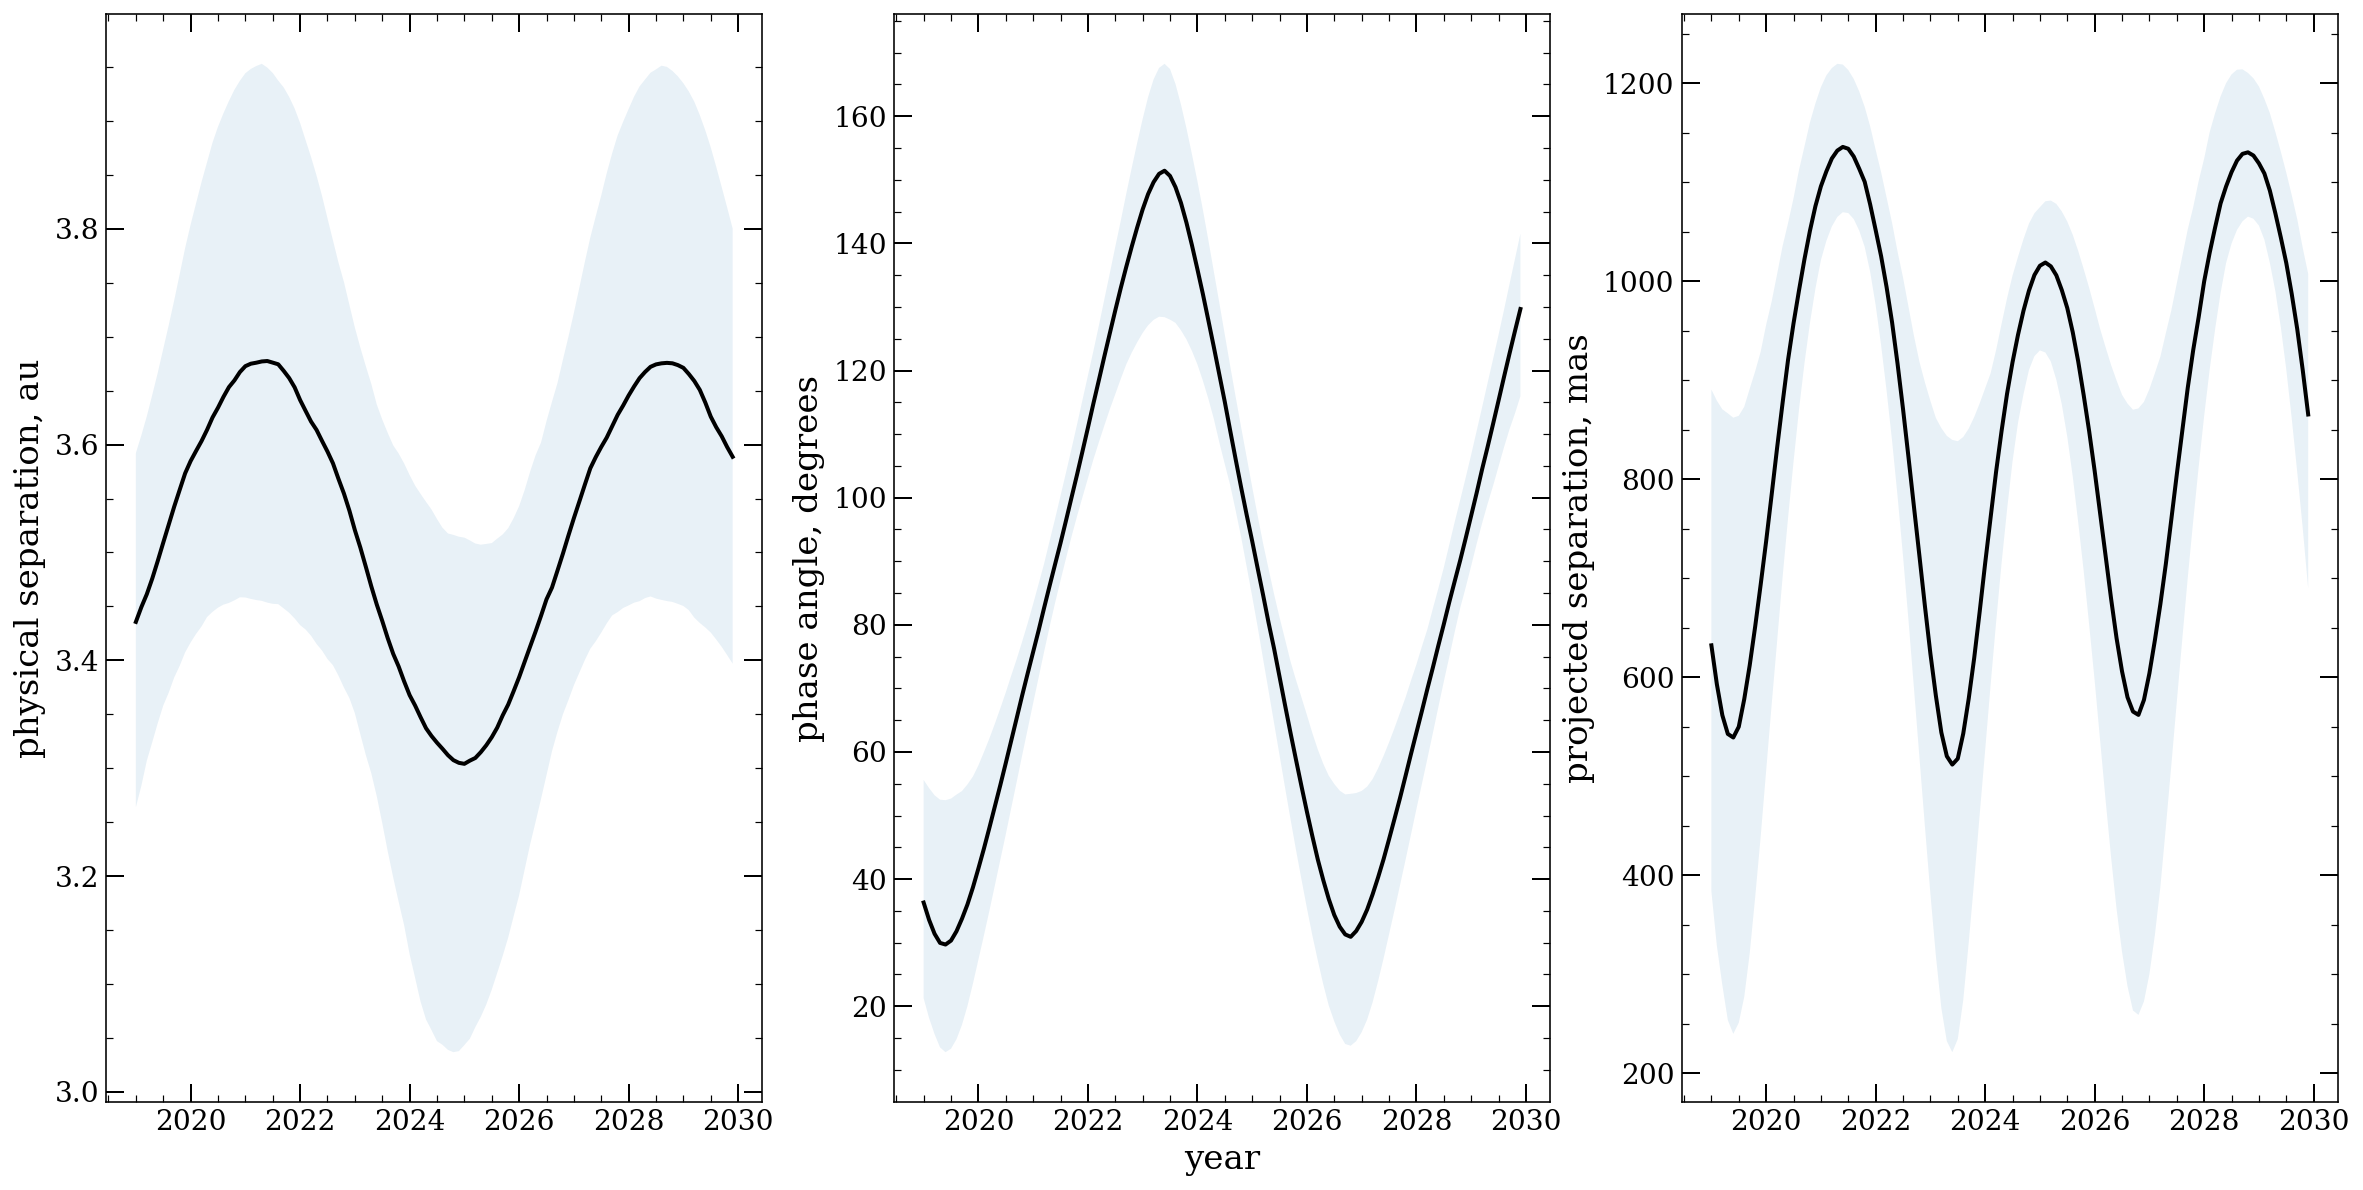

In [82]:
# first lets look at the physical separation, phase angle, and projected separation as a function
# of time for 2019-2029
dates, seps, alphas, projs = np.loadtxt('phase_separation.csv',usecols=(0,2,5,8),unpack=True,skiprows=1,delimiter=',')
lower_bounds = np.loadtxt('phase_separation.csv',usecols=(0,1,4,7),unpack=True,skiprows=1,delimiter=',')
upper_bounds = np.loadtxt('phase_separation.csv',usecols=(0,3,6,9),unpack=True,skiprows=1,delimiter=',')

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.fill_between(dates,lower_bounds[1],upper_bounds[1],alpha=0.1)
plt.plot(dates,seps,color='k')
plt.ylabel('physical separation, au',fontsize=17)
plt.subplot(1,3,2)
plt.fill_between(dates,lower_bounds[2],upper_bounds[2],alpha=0.1)
plt.plot(dates,alphas,color='k')
plt.xlabel('year',fontsize=17)
plt.ylabel('phase angle, degrees',fontsize=17)
plt.subplot(1,3,3)
plt.fill_between(dates,lower_bounds[3],upper_bounds[3],alpha=0.1)
plt.ylabel('projected separation, mas',fontsize=17)
plt.plot(dates,projs,color='k')

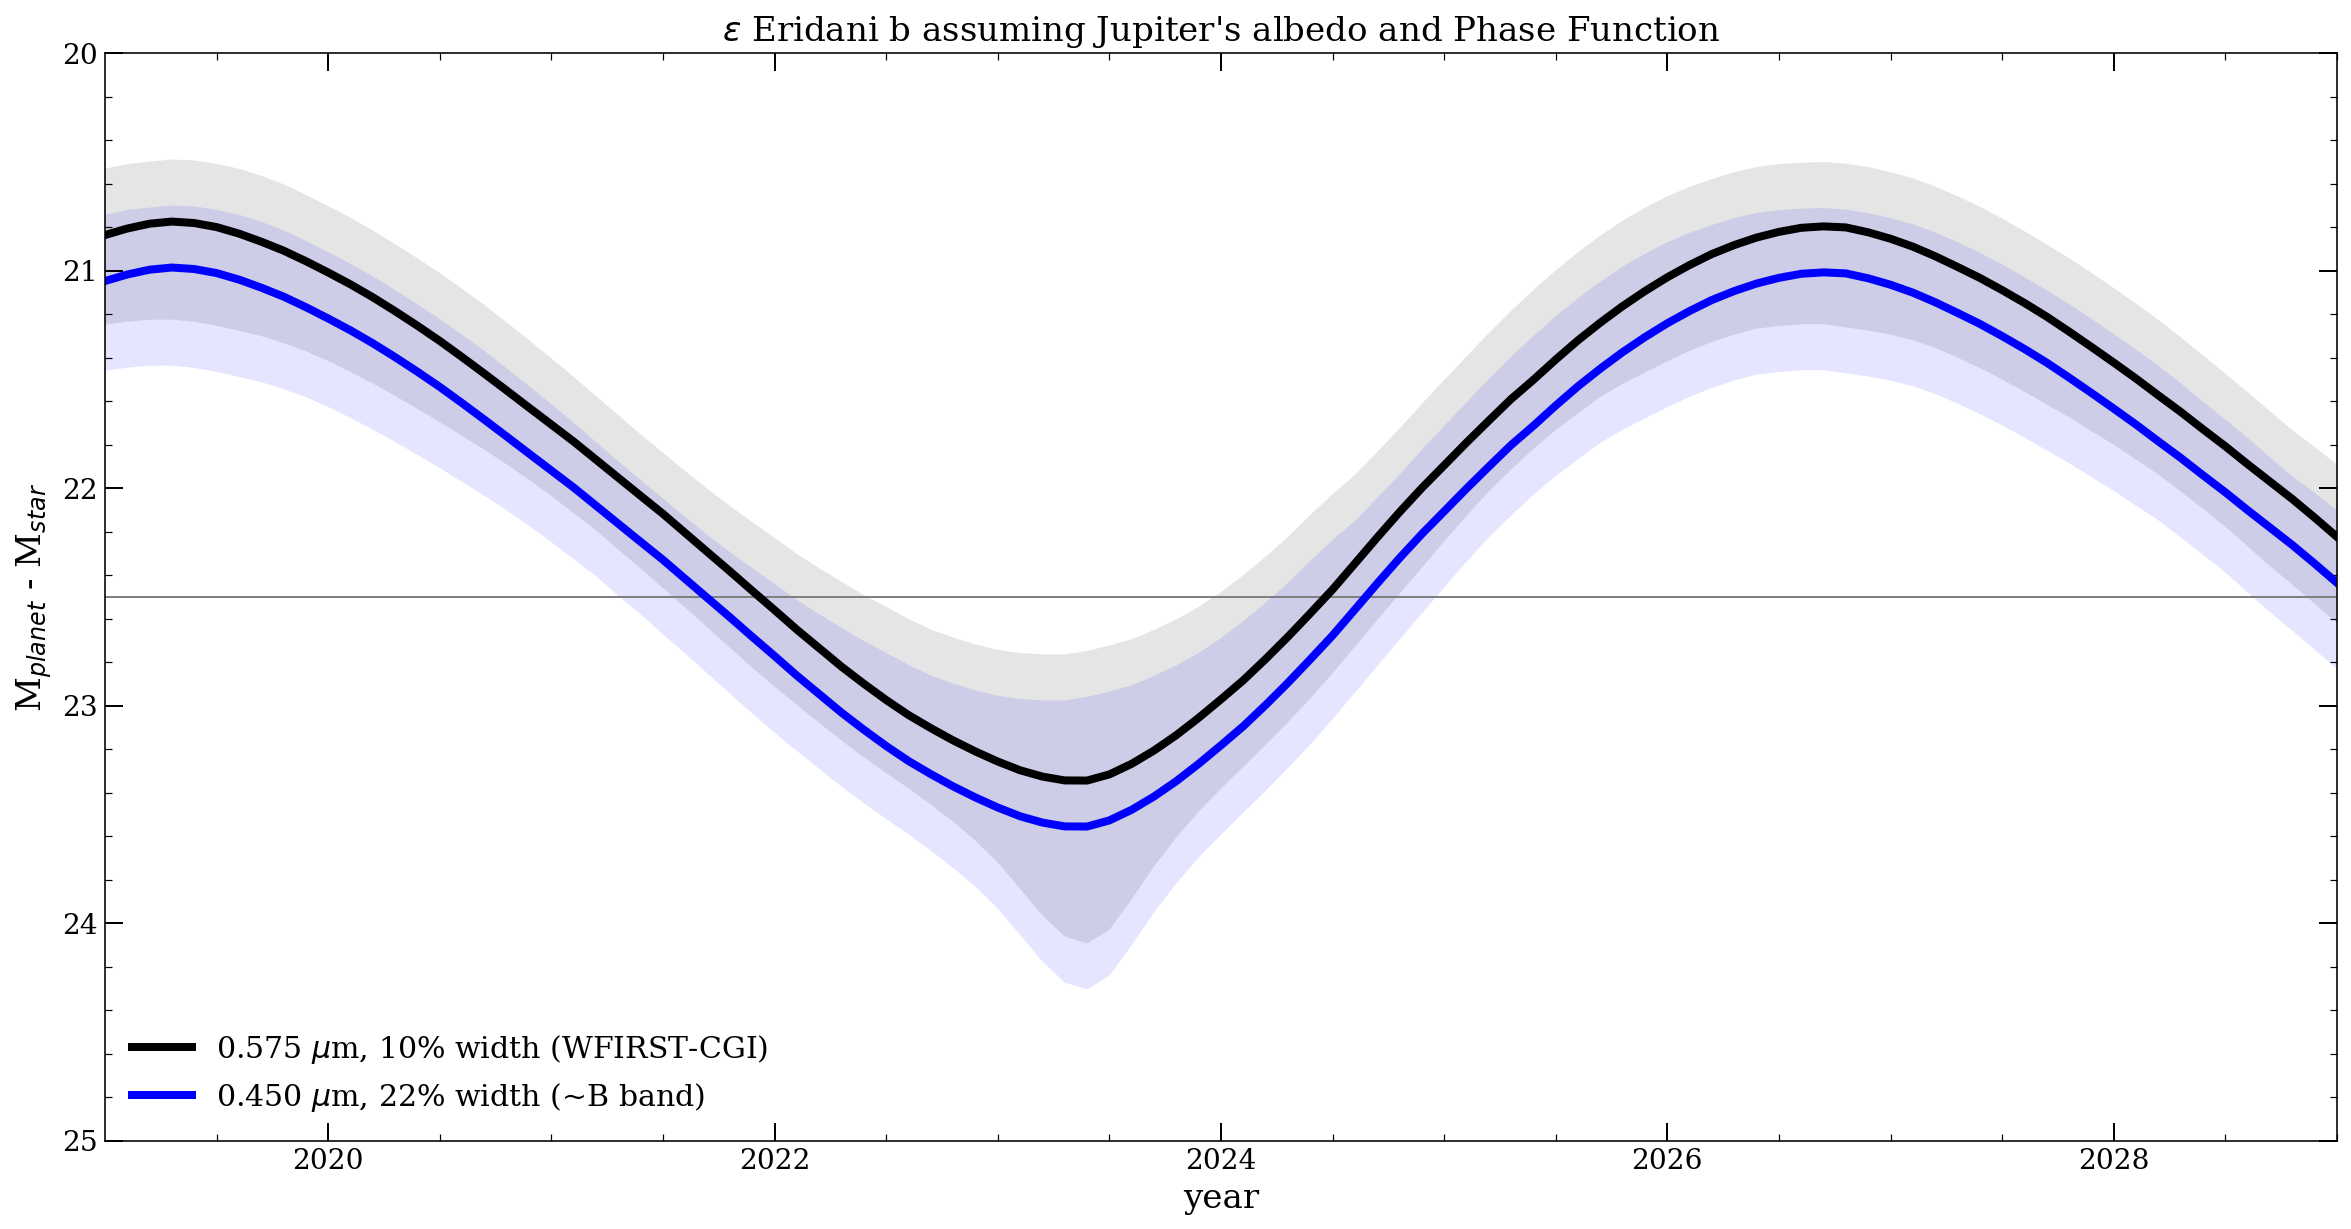

In [86]:
# now lets incorporate our planet models to get a delta magnitude to go along with these...
plt.figure(figsize=(20,10))
lc_im1 = []
lc_imB = []
dates, seps, alphas, projs = np.loadtxt('phase_separation.csv',usecols=(0,2,5,8),unpack=True,skiprows=1,delimiter=',')
for alpha,date,sep,proj in zip(alphas,dates,seps,projs): 
    epsEri['sep'] = sep
    epsEri['phi'] = mu.avg_empirical(alpha,degrees=True) 
    epsEri['wa'] = proj / 206264806.24709466 # want it to be in radians, not mas
    epsEri.update(mu.cbe_hlc_pars)    
    lc_im1.append(simdata.imaging_delta_mag(0.575, 10.1, epsEri))
    lc_imB.append(simdata.imaging_delta_mag(0.45, 22.0, epsEri))    
lc_im1 = np.array(lc_im1)
lc_imB = np.array(lc_imB)   
plt.plot(dates,lc_im1,color='black',linewidth=4,label='0.575 $\mu$m, 10% width (WFIRST-CGI)')    
plt.plot(dates,lc_imB,color='blue',linewidth=4,label='0.450 $\mu$m, 22% width (~B band) ')  

lc_im1 = []
lc_imB = []
dates, seps, alphas, projs = lower_bounds
for alpha,date,sep,proj in zip(alphas,dates,seps,projs): 
    epsEri['sep'] = sep
    epsEri['phi'] = mu.avg_empirical(alpha,degrees=True) 
    epsEri['wa'] = proj / 206264806.24709466 # want it to be in radians, not mas
    epsEri.update(mu.cbe_hlc_pars)    
    lc_im1.append(simdata.imaging_delta_mag(0.575, 10.1, epsEri))
    lc_imB.append(simdata.imaging_delta_mag(0.45, 22.0, epsEri))    
lc_im1_lb = np.array(lc_im1)
lc_imB_lb = np.array(lc_imB)   

lc_im1 = []
lc_imB = []
dates, seps, alphas, projs = upper_bounds
for alpha,date,sep,proj in zip(alphas,dates,seps,projs):  
    epsEri['sep'] = sep
    epsEri['phi'] = mu.avg_empirical(alpha,degrees=True) 
    epsEri['wa'] = proj / 206264806.24709466 # want it to be in radians, not mas
    epsEri.update(mu.cbe_hlc_pars)    
    lc_im1.append(simdata.imaging_delta_mag(0.575, 10.1, epsEri))
    lc_imB.append(simdata.imaging_delta_mag(0.45, 22.0, epsEri))    
lc_im1_ub = np.array(lc_im1)
lc_imB_ub = np.array(lc_imB)   

plt.fill_between(dates,lc_im1_lb,lc_im1_ub,facecolor='black',alpha=0.1)
plt.fill_between(dates,lc_imB_lb,lc_imB_ub,facecolor='blue',alpha=0.1)

plt.axis([2019,2029,25.0,20.0])
plt.hlines(-2.5*np.log10(10.0**-9.0),2019,2030,color='grey',linewidth=1)
plt.xlabel('year',fontsize=17)
plt.ylabel('M$_{planet}$ - M$_{star}$',fontsize=17)
plt.title('$\epsilon$ Eridani b assuming Jupiter\'s albedo and Phase Function',fontsize=17)
plt.legend(frameon=False,loc='lower left',fontsize=15)